In [13]:
from Stocker.stocker import Stocker
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime

### References ###
*[超簡單用Python預測股價](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE-Machine-Learning-%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9/)

In [62]:
start = datetime(2005, 1, 1)
end = datetime(2017, 1, 10)

# TSM: 台積電
# 2317.TW: 鴻海
df = web.DataReader('TSM', 'yahoo', start) 
df = df[['Close']]
df.head()

,Close
Date,
2004-12-31,7.811152
2005-01-03,7.728349
2005-01-04,7.433935
2005-01-05,7.286729
2005-01-06,7.222326


In [63]:
### 讀入series
# df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.tail()

Date
2019-12-16    58.540001
2019-12-17    59.230000
2019-12-18    59.099998
2019-12-19    57.959999
2019-12-20    57.930000
Name: Close, dtype: float64

In [64]:
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2004-12-31 00:00:00 to 2019-12-20 00:00:00.


Predicted Price on 2019-12-27 00:00:00 = $56.55


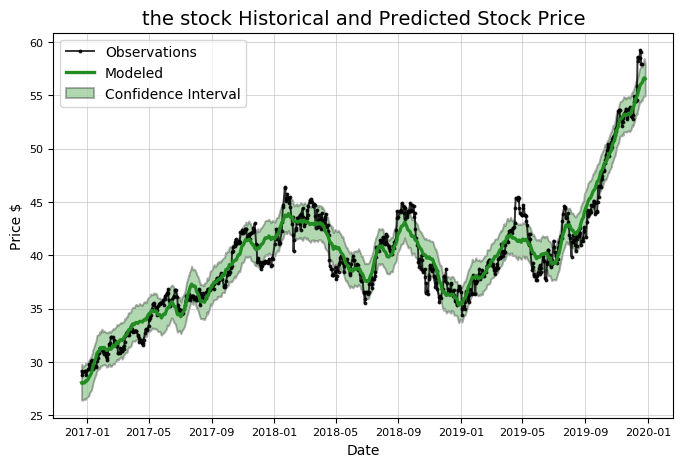

In [65]:
model, model_data = tsmc.create_prophet_model(days=7)


Prediction Range: 2018-12-20 00:00:00 to 2019-12-20 00:00:00.

Predicted price on 2019-12-19 00:00:00 = $30.94.
Actual price on    2019-12-19 00:00:00 = $57.96.

Average Absolute Error on Training Data = $0.95.
Average Absolute Error on Testing  Data = $8.39.

When the model predicted an increase, the price increased 56.19% of the time.
When the model predicted a  decrease, the price decreased  41.78% of the time.

The actual value was within the 80% confidence interval 12.30% of the time.


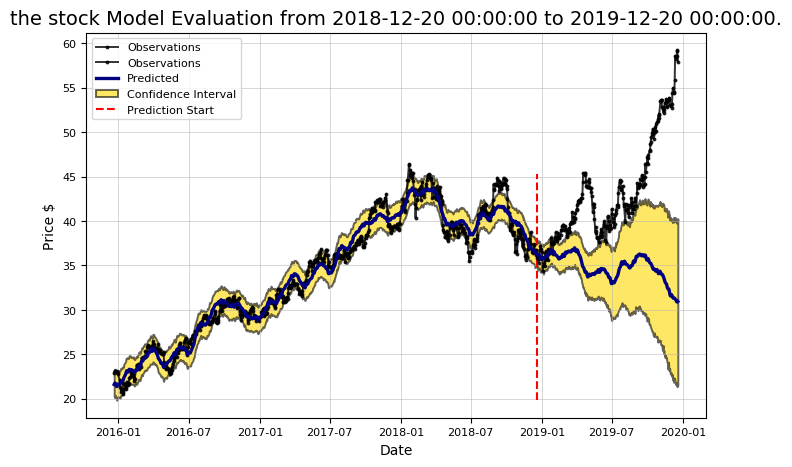

In [66]:
tsmc.evaluate_prediction()

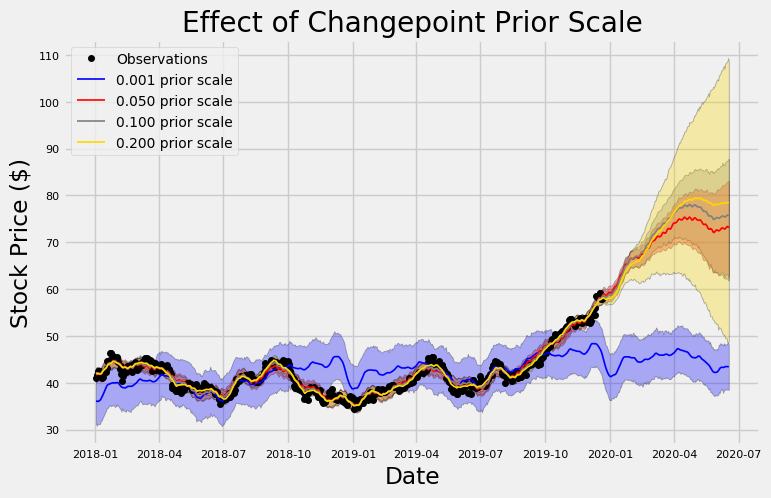

In [52]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])



Predicted Increase: 

          Date   estimate    change      upper      lower
2   2019-12-22  58.184919  0.233101  59.301772  57.014575
7   2019-12-27  57.875912  0.054040  59.071242  56.764653
9   2019-12-29  58.033161  0.157249  59.163579  56.960317
13  2020-01-02  58.027084  0.041172  59.218017  56.759902
14  2020-01-03  58.119623  0.092539  59.442427  56.907854
16  2020-01-05  58.387598  0.267975  59.594329  57.154339
17  2020-01-06  58.555020  0.167422  59.877039  57.222677
18  2020-01-07  58.746247  0.191226  60.086374  57.410084
19  2020-01-08  58.947563  0.201317  60.288934  57.635801
20  2020-01-09  59.143495  0.195932  60.531802  57.604995
21  2020-01-10  59.342817  0.199322  60.628727  57.938775
23  2020-01-12  59.918261  0.575444  61.429765  58.402564
24  2020-01-13  60.341939  0.423678  61.825171  58.924974
25  2020-01-14  60.801623  0.459683  62.336040  59.237166
26  2020-01-15  61.216338  0.414715  62.817907  59.680599
27  2020-01-16  61.542421  0.326083  63.255359  5

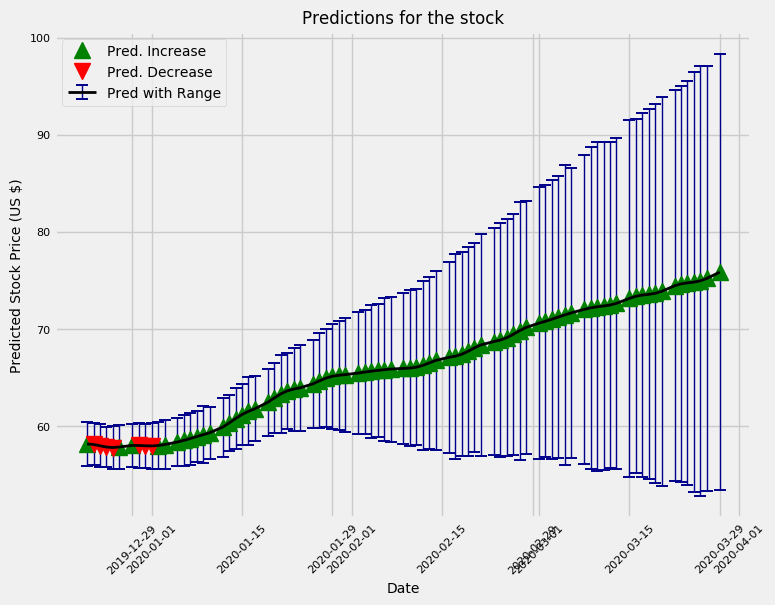

In [53]:
tsmc.predict_future(days=100)
